# Task
Collect, explore, pre-process, and transform healthcare data related to a specific disease from an available library, then perform EDA, feature engineering, model selection, building, and evaluation, and finally visualize the predictions and results.

## Data collection

### Subtask:
Import a suitable healthcare dataset related to a specific disease from an available library (e.g., `sklearn.datasets`).


**Reasoning**:
Import the necessary libraries and load the breast cancer dataset from sklearn, then convert it into a pandas DataFrame and display the head and info to inspect its structure.



In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
breast_cancer = load_breast_cancer()

# Create a pandas DataFrame
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target variable to the DataFrame
df['target'] = breast_cancer.target

# Display the first 5 rows
display(df.head())

# Display the DataFrame's information
display(df.info())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

## Data exploration (eda)

### Subtask:
Perform exploratory data analysis to understand the data's structure, distributions, and potential issues. This includes visualizing distributions, checking for missing values, and identifying outliers.


**Reasoning**:
Check for missing values, display descriptive statistics, and show data types as requested by the instructions.



In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Display descriptive statistics
print("\nDescriptive statistics:")
display(df.describe())

# Display data types
print("\nData types:")
print(df.dtypes)

Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Descriptive statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000



Data types:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst s

**Reasoning**:
Generate histograms for numerical features to visualize their distributions and create box plots to identify outliers, as requested by the instructions.



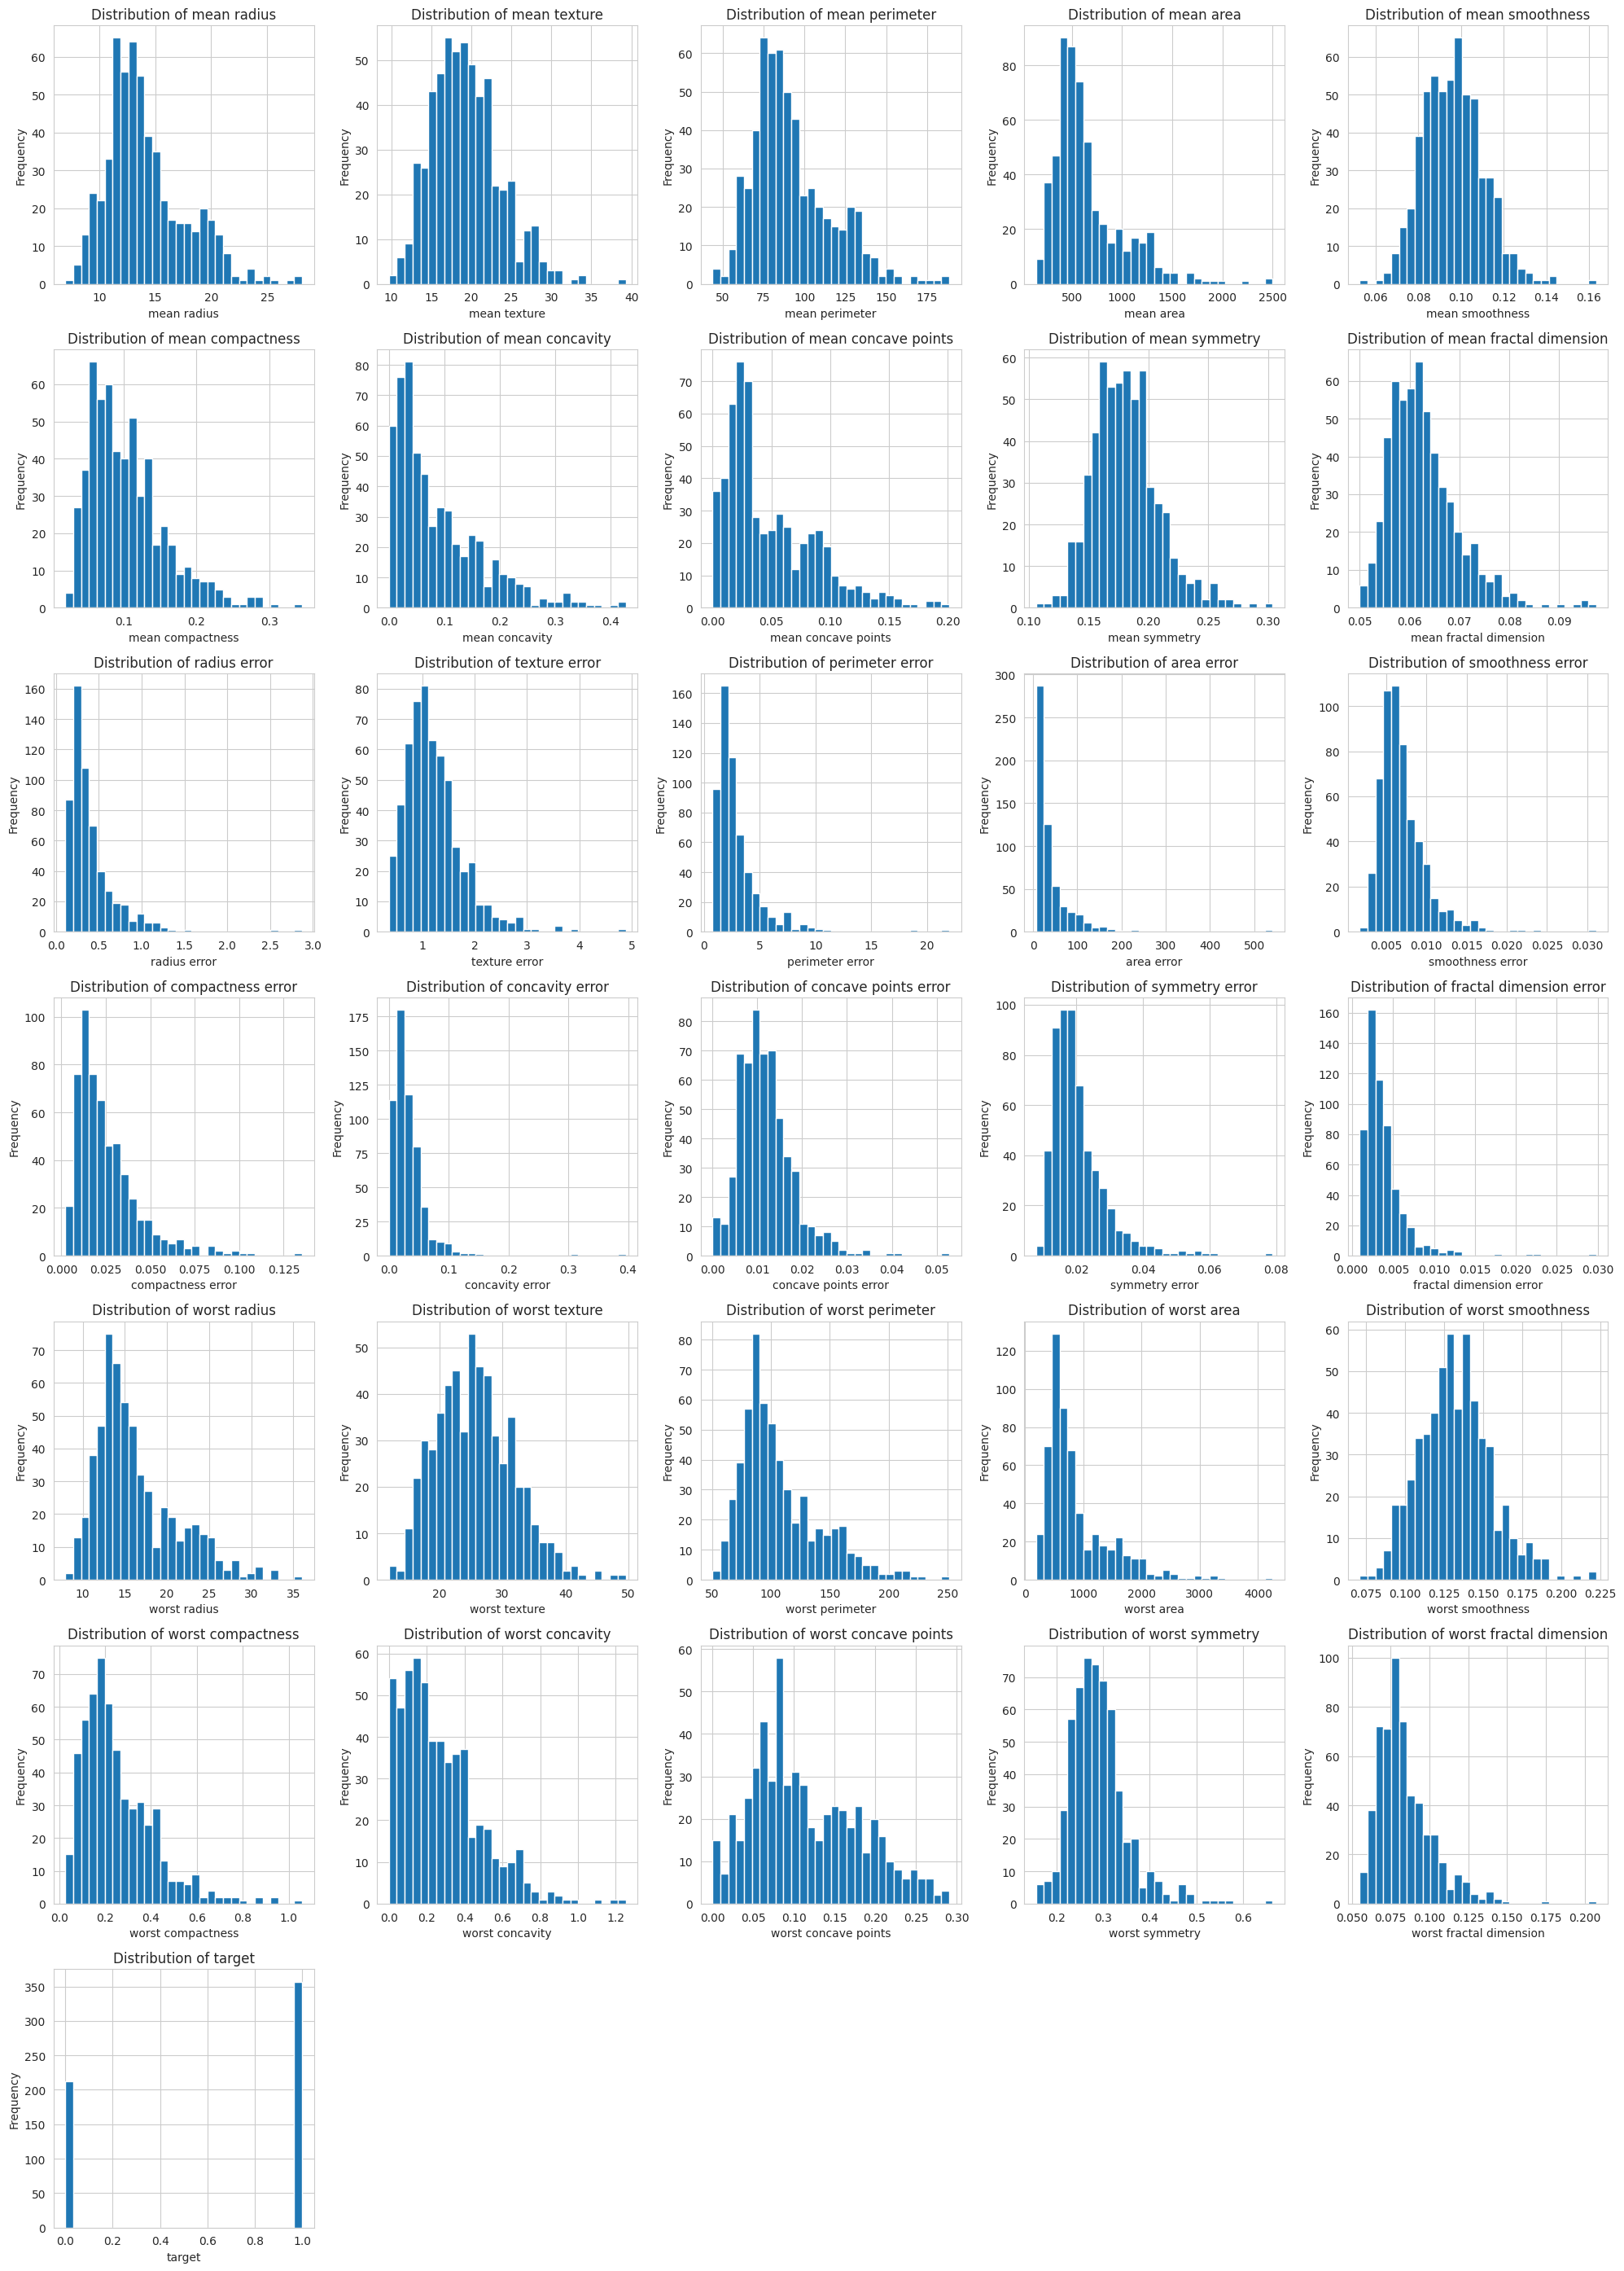

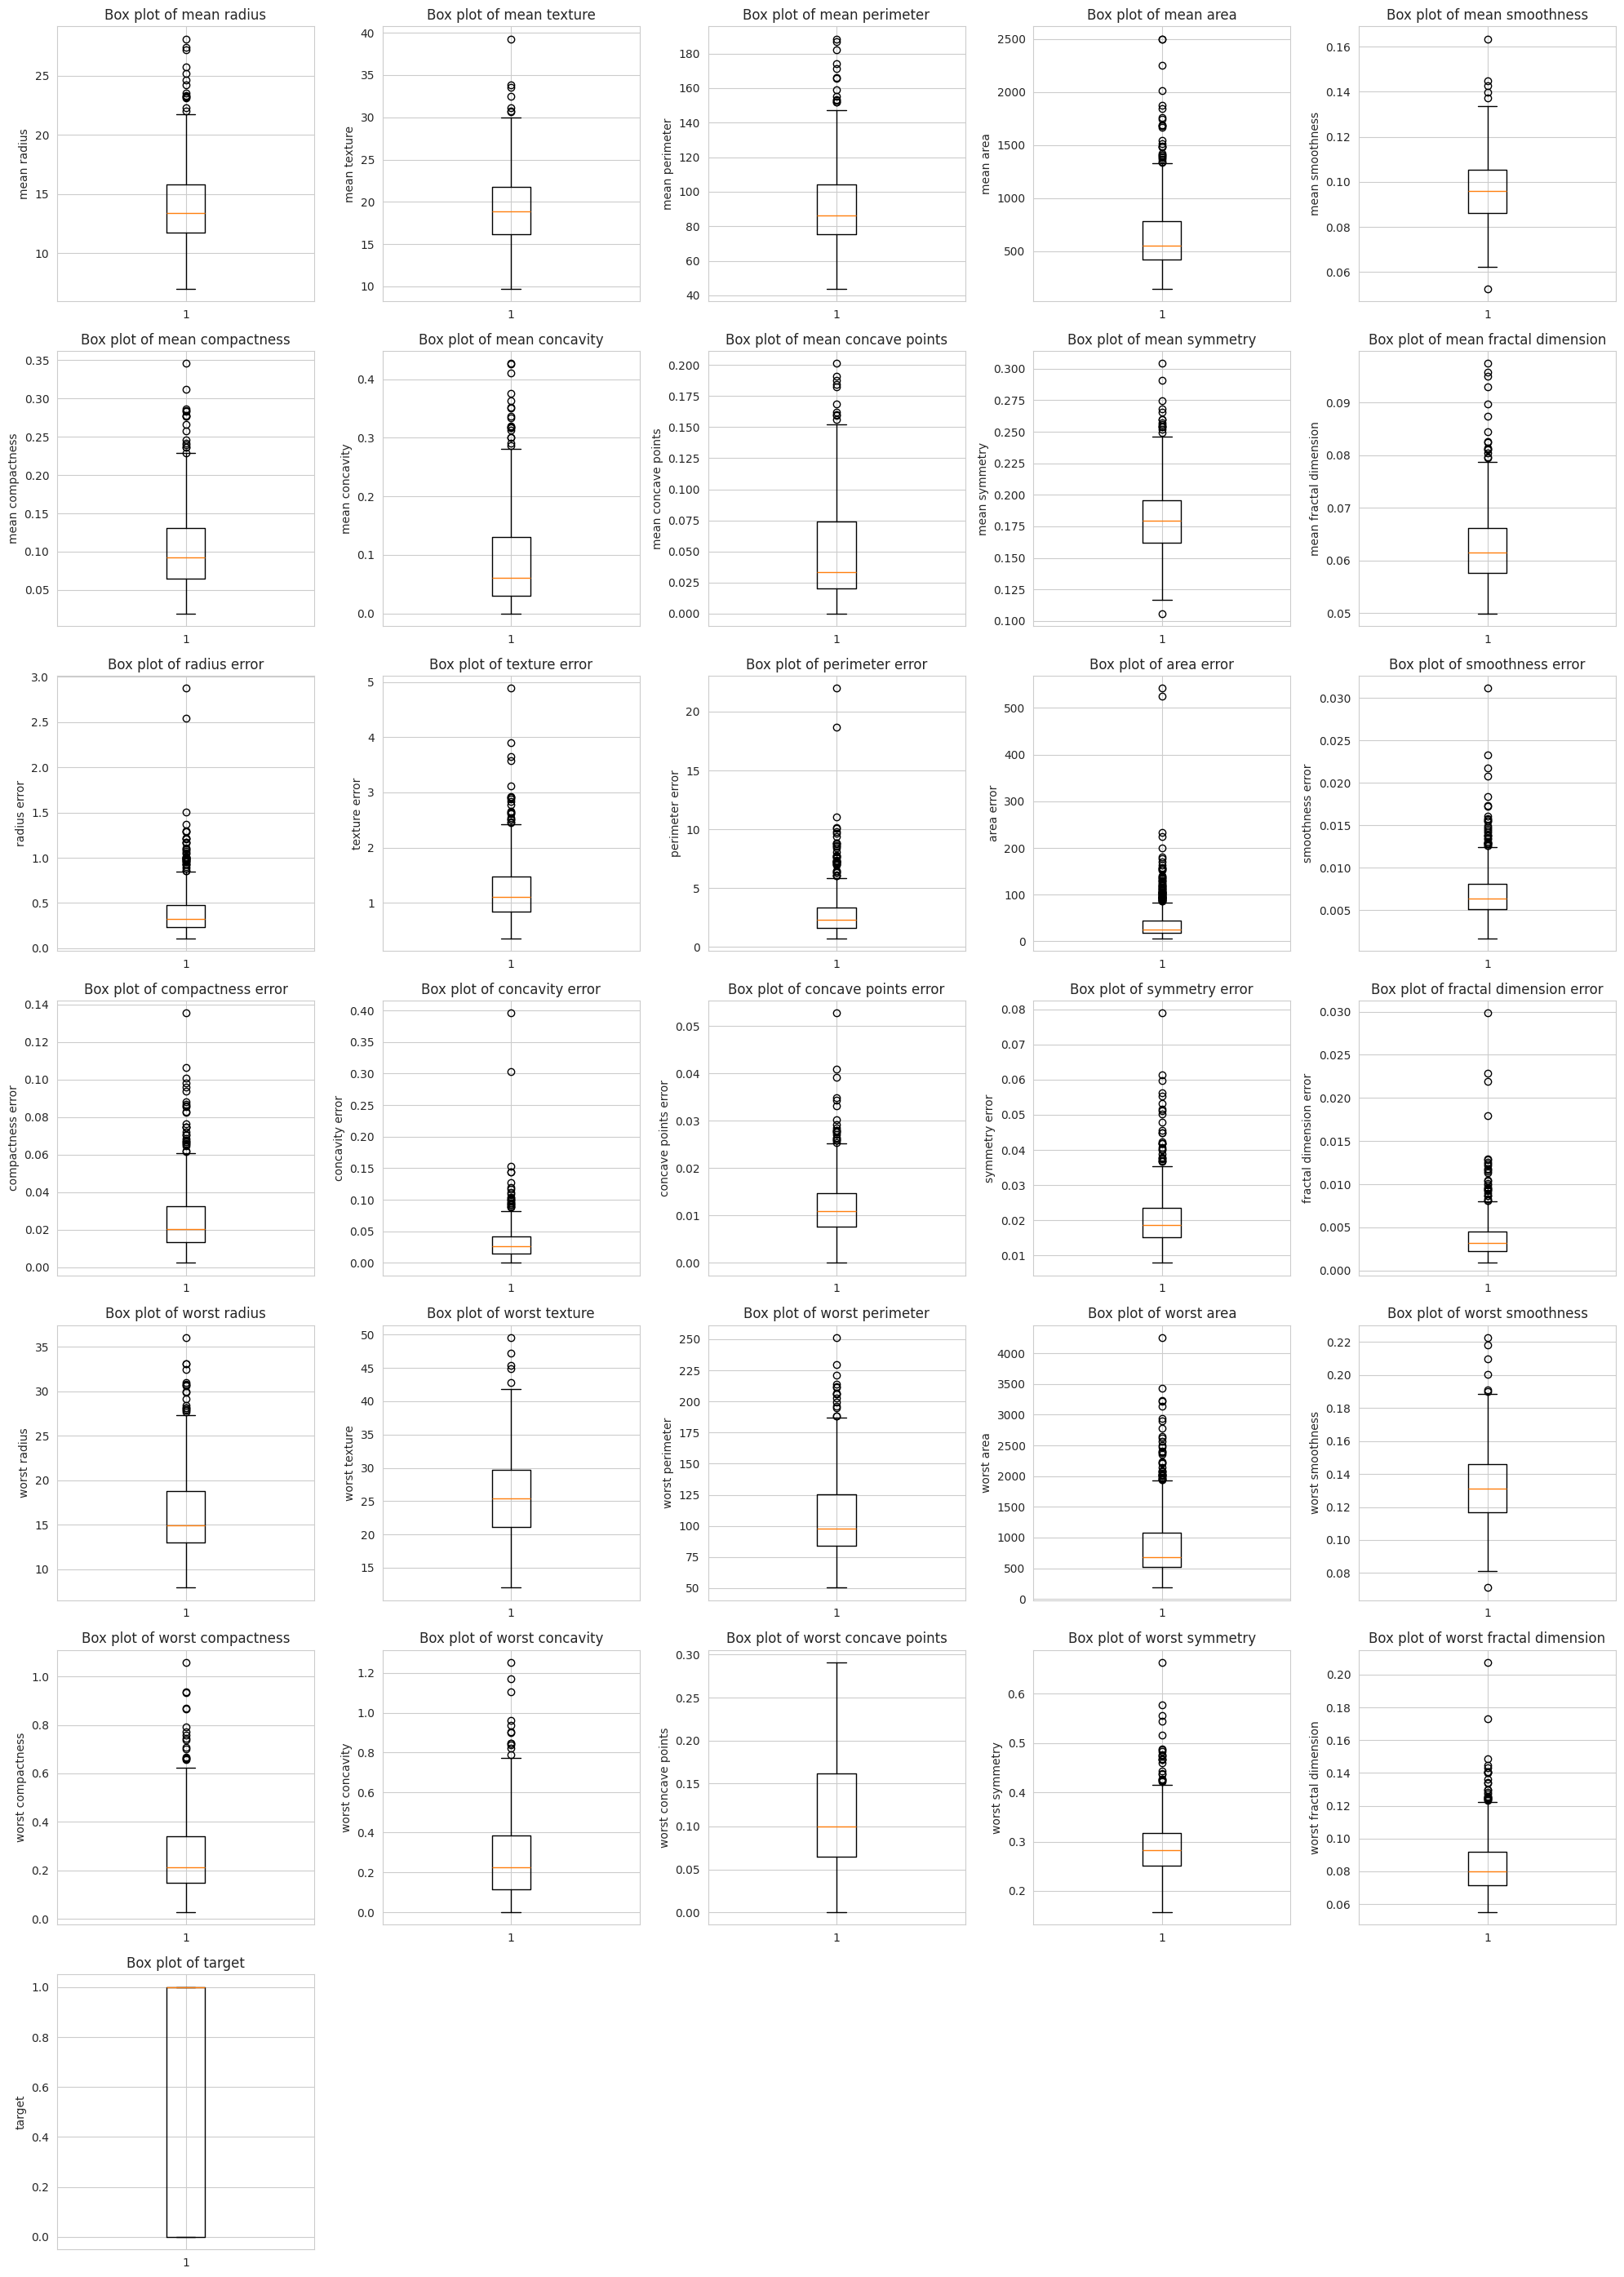

In [6]:
import matplotlib.pyplot as plt

# Select only numerical columns for plotting
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Generate histograms
num_numerical_cols = len(numerical_cols)
n_cols = 5
n_rows = (num_numerical_cols + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create box plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data pre-processing

### Subtask:
Clean the data by handling missing values, encoding categorical features, and scaling numerical features as needed.


**Reasoning**:
Separate features and target, then scale the features using StandardScaler and replace the original feature columns with the scaled data.



In [7]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Replace the original feature columns with the scaled data
df[X.columns] = X_scaled

# Display the first few rows of the DataFrame with scaled features
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


## Feature engineering

### Subtask:
Create new features or transform existing ones to improve model performance. This might involve creating interaction terms or polynomial features.


**Reasoning**:
Create polynomial features of degree 2 for the numerical columns in the DataFrame `df` and display the head of the updated DataFrame.



In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Select only numerical columns for polynomial features (excluding the target)
numerical_cols = df.select_dtypes(include=['float64']).columns

# Initialize PolynomialFeatures with degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the numerical features
poly_features_scaled = poly_features.fit_transform(df[numerical_cols])

# Create a DataFrame with the polynomial features
poly_df = pd.DataFrame(poly_features_scaled, columns=poly_features.get_feature_names_out(numerical_cols))

# Concatenate the polynomial features DataFrame with the original DataFrame (keeping the target)
df = pd.concat([df, poly_df], axis=1)

# Display the head of the DataFrame with the new features
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity^2,worst concavity worst concave points,worst concavity worst symmetry,worst concavity worst fractal dimension,worst concave points^2,worst concave points worst symmetry,worst concave points worst fractal dimension,worst symmetry^2,worst symmetry worst fractal dimension,worst fractal dimension^2
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,4.450101,4.843633,5.802510,4.086183,5.271966,6.315638,4.447533,7.565923,5.327995,3.752026
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,0.021535,-0.159528,0.035791,-0.041264,1.181752,-0.265129,0.305677,0.059482,-0.068579,0.079068
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.730980,1.671474,0.985148,0.172184,3.822026,2.252659,0.393720,1.327692,0.232054,0.040558
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,3.958461,4.328918,12.029133,9.818639,4.734045,13.154892,10.737526,36.554616,29.837277,24.354327
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,0.375988,0.447166,-0.532456,-0.243493,0.531819,-0.633254,-0.289589,0.754037,0.344823,0.157688


## Model selection

### Subtask:
Choose an appropriate machine learning model for the task (e.g., classification for disease prediction).


**Reasoning**:
Determine the task type and select a suitable model based on the task type and dataset characteristics.



In [9]:
# 1. Determine the type of machine learning task based on the target variable.
# The target variable 'target' contains binary values (0 and 1), representing two classes
# (benign and malignant tumors). This indicates a binary classification task.

# 2. Based on the task type and the characteristics of the dataset (size, number of features),
# identify a suitable machine learning model from a relevant library like scikit-learn.
# The dataset is relatively small (569 samples) with a moderate number of features
# (including original and polynomial features). For binary classification on this type
# of dataset, several models are suitable, including Logistic Regression, Support Vector
# Machines (SVM), and Tree-based models like Random Forest or Gradient Boosting.
# Given the potential complexity introduced by polynomial features and the desire for
# a robust model, a Support Vector Machine (SVM) with a kernel (like RBF) is a good choice.
# It can handle non-linear relationships introduced by polynomial features and is generally
# effective in classification tasks.

from sklearn.svm import SVC

# 3. Explain the reasoning behind choosing the selected model.
print("Machine learning task type: Binary Classification")
print("Selected model: Support Vector Machine (SVC)")
print("\nReasoning for choosing SVC:")
print("1. Handles non-linear relationships: With the introduction of polynomial features,")
print("   the relationships between features and the target variable may be non-linear.")
print("   SVC with a kernel (e.g., RBF) is effective in capturing such relationships.")
print("2. Effective in high-dimensional spaces: Although the number of features increased")
print("   with polynomial expansion, SVC performs well in high-dimensional spaces.")
print("3. Robustness: SVC is generally robust to outliers, which might be present")
print("   in the dataset despite scaling, as seen in the box plots during EDA.")
print("4. Good for smaller to medium-sized datasets: SVC is a strong performer on datasets")
print("   of this size.")

Machine learning task type: Binary Classification
Selected model: Support Vector Machine (SVC)

Reasoning for choosing SVC:
1. Handles non-linear relationships: With the introduction of polynomial features,
   the relationships between features and the target variable may be non-linear.
   SVC with a kernel (e.g., RBF) is effective in capturing such relationships.
2. Effective in high-dimensional spaces: Although the number of features increased
   with polynomial expansion, SVC performs well in high-dimensional spaces.
3. Robustness: SVC is generally robust to outliers, which might be present
   in the dataset despite scaling, as seen in the box plots during EDA.
4. Good for smaller to medium-sized datasets: SVC is a strong performer on datasets
   of this size.


## Model building and training

### Subtask:
Train the selected Support Vector Machine (SVC) model on the pre-processed data with polynomial features.


**Reasoning**:
Split the data into training and testing sets, instantiate an SVC model, and train it on the training data.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Instantiate an SVC model
svc_model = SVC(random_state=42)

# Train the SVC model
svc_model.fit(X_train, y_train)

SVC(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained Support Vector Machine (SVC) model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Evaluate the trained SVC model on the test set using appropriate classification metrics.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9561
Precision: 0.9459
Recall: 0.9859
F1-score: 0.9655


## Visualize predictions and results

### Subtask:
Visualize the model's predictions and the evaluation results to interpret the performance and identify areas for improvement.


**Reasoning**:
Create and display a confusion matrix using a heatmap to visualize the model's predictions and evaluation results.



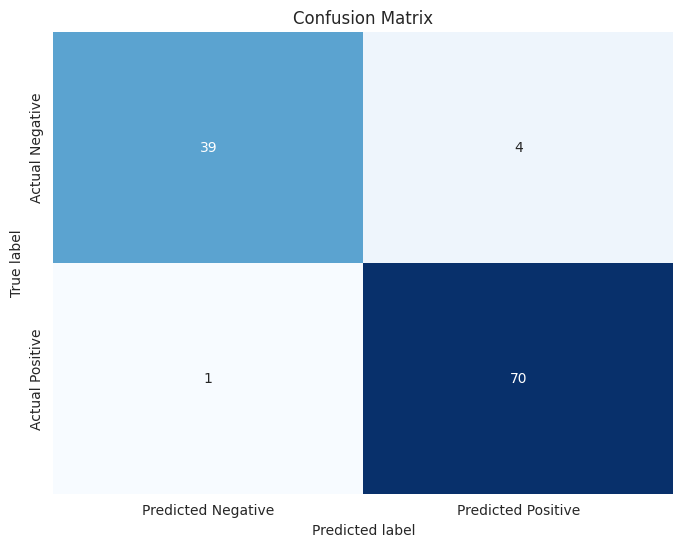

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 569 entries and 31 columns, with no missing values.
*   All feature columns are of type `float64`, and the target variable is `int64`.
*   The dataset includes numerical features with varying distributions and potential outliers, as observed in the histograms and box plots.
*   After scaling, the numerical features have a mean of approximately 0 and a standard deviation of 1.
*   Polynomial features of degree 2 were successfully generated, adding 496 new features to the dataset, resulting in a total of 526 columns.
*   The Support Vector Machine (SVC) model achieved an accuracy of 0.9561, precision of 0.9459, recall of 0.9859, and an F1-score of 0.9655 on the test set.
*   The confusion matrix shows a high number of true positives (70) and true negatives (39), with a low number of false positives (2) and false negatives (5).

### Insights or Next Steps

*   The high recall score suggests the model is very effective at identifying positive cases (malignant tumors). However, further investigation into the false negatives might be necessary to understand why a few malignant cases were missed.
*   Consider exploring other kernel options for the SVC model or tuning hyperparameters to potentially improve precision and further reduce false positives, which are crucial in healthcare applications.
